<a href="https://colab.research.google.com/github/lstarke/Health-Insurance-Cost-Prediction/blob/main/LeandroStarke_Health_Insurance_Cost_Prediction_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

## Sobre o problema - Health Insurance Cost

<center><img src="https://drive.google.com/uc?export=view&id=1vwwSzYFJxMxSEtPktnq96J6y3H1hAmX0" width="80%"></p></center>

Neste projeto será utilizado um dataset disponivel no Kaggle chamado [Health Insurance Cost Prediction](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction). Nele temos informações sobre pacientes de um plano de saúde e seus respectivos custos médicos. Ele inclui 1338 entradas com 7 variáveis:

* `age`: idade do paciente
* `sex`: gênero do paciente (masculino ou feminino)
* `bmi`: Índice de Massa Corporal (IMC) do paciente
* `children`: número de filhos dependentes do paciente
* `smoker`: informação se o paciente é fumante ou não
* `region`: região dos Estados Unidos em que o paciente reside (nordeste, sudeste, sudoeste ou noroeste)
* `charges`: custo médico individual do paciente durante um ano

O objetivo do conjunto de dados é prever o custo médico de um paciente com base em suas características pessoais, um problema de regressão, onde a variável alvo é `charges`.

Esse conjunto de dados é interessante porque pode ajudar a compreender como as características pessoais de um paciente podem influenciar nos custos médicos. Além disso, ele pode ser utilizado para criar modelos de precificação de seguros de saúde ou para identificar pacientes com alto risco de custos médicos.

## Sobre Auto Machine Learning (AutoML)

<center><img src="https://drive.google.com/uc?export=view&id=1vB46w2YoEmLKSpxqx4aRh2wbZOM_TTk7" width="80%"></p></center>

Uma ferramenta útil para cientistas de dados e desenvolvedores que desejam criar rapidamente modelos de aprendizado de máquina e acelerar o processo de experimentação de modelos.

PyCaret é uma biblioteca de auto machine learning (AutoML) de código aberto que visa simplificar o processo de criação de modelos de aprendizado de máquina. Ela fornece uma interface de usuário intuitiva e fácil de usar para realizar tarefas comuns de ciência de dados, como pré-processamento de dados, seleção de recursos, validação cruzada e ajuste de hiperparâmetros.

Com o PyCaret, é possível construir rapidamente vários modelos de aprendizado de máquina, desde modelos de regressão e classificação até modelos de clustering e detecção de anomalias. Além disso, a biblioteca inclui recursos como a criação de fluxos de trabalho de ponta a ponta, seleção automática de recursos e explicações de modelo.

# Instalação de pacotes

In [1]:
# descomentar linhas abaixo quando rodar a primeira vez
!pip install matplotlib==3.6.3
!pip install numpy==1.20.3
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.20.3 which is incompatible.
jaxlib 0.4.7+cuda11.cudnn86 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.
jax 0.4.7 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Importação de pacotes

In [9]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# from pandas_profiling import ProfileReport
from sklearn.preprocessing import KBinsDiscretizer

# Utils

In [3]:
# método auxiliar que retorna features numéricas
def get_numerical_features(df: pd.DataFrame) -> list:
  # comprehension list para identificar as variáveis numéricas do DataFrame
  return [feature for feature in df.columns if df[feature].dtypes != "O"]

# método auxiliar que retorna features categóricas
def get_categorical_features(df: pd.DataFrame) -> list:
  return [feature for feature in df.columns if df[feature].dtypes == "O"]

In [4]:
# versão do python
!python --version

Python 3.9.16


# EDA - Exploratory Data Analysis

In [5]:
# importar os dados
DATA_PATH = "/content/insurance.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# inspecionando quantidade de linhas e colunas do DataFrame
df.shape

(1338, 7)

## Relatório Pandas Profiling

In [10]:
profile = ProfileReport(df, title="Insurance EDA")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusões Pandas Profiling



* Não há dados falstantes no DataFrame;
* Idade mínima e máxima são 18 e 64, respectivamente;
* Há uma maior concentração de pessoas com idade abaixo de 20 anos;
* A proporção de sexo masculino e feminino varia somente 1%;
* A distribuição da variável `bmi` (IMC) é normal;
* A distribuição da variável `children` é assimétrica positiva;
* Aproximadamente 43% das pessoas não tem filhos;
* 20% das pessoas são fumantes;
* A distribuição da variável `charges` é assimétrica positiva;






## Categorizando Idade com KBinsDiscretizer

KBinsDiscretizer é um transformador de pré-processamento de dados da biblioteca scikit-learn (sklearn.preprocessing) que divide determinada feature em intervalos (bins) discretos e categóricos com base em um número especificado de bins. 

Isso pode ser útil em algumas situações em que você deseja converter uma característica contínua em uma característica categórica. Por exemplo, se você estiver trabalhando com dados de idade, pode ser interessante discretizar as idades em faixas etárias (por exemplo, 0-10, 10-20, 20-30, etc.) em vez de manter a idade como uma característica contínua.

O KBinsDiscretizer usa a estratégia de "uniform" ou "quantile" para definir os limites dos bins. Quando a estratégia é "uniform", todos os bins têm a mesma largura. Quando a estratégia é "quantile", cada bin contém aproximadamente o mesmo número de amostras.

Definimos o parâmetro encode como ordinal, assim, cada bin é representado por um único número inteiro, que indica a ordem do bin. A primeira ordem é 0, a segunda ordem é 1, e assim por diante. Cada característica original é substituída por um vetor de números inteiros correspondente aos bins discretizados. Essa opção é útil quando existe uma relação ordinal entre os bins.

In [11]:
# definindo o número de intervalos
n_bins = 5

# criando o objeto KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')

# atribuindo uma nova coluna ao DataFrame contendo o identificador do grupo ao qual a pessoa pertence
df = df.assign(age_discretized = discretizer.fit_transform(df.age.values.reshape(-1, 1)))
df.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized
0,19,female,27.900,0,yes,southwest,16884.92400,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0


Abaixo podemos ver melhor o que o KBinsDiscretizer faz.

1. Grupo 1: Somente pessoas com idade entre 18 e 23 anos;
2. Grupo 2: Somente pessoas com idade entre 24 e 33 anos;
3. Grupo 3: Somente pessoas com idade entre 34 e 43 anos;
3. Grupo 4: Somente pessoas com idade entre 44 e 53 anos;
3. Grupo 5: Somente pessoas com idade entre 54 e 64 anos;



In [12]:
# verificando valores unicos na coluna age_discretized
bins = df.age_discretized.unique()

# laço sobre a lista de bins e imprimindo os valores mínmos e máximos encontrados dentro de cada bin
for bin in sorted(bins):
  print(f"bin = {int(bin)}: {df[df.age_discretized == bin].age.min()} - {df[df.age_discretized == bin].age.max()}")

bin = 0: 18 - 23
bin = 1: 24 - 33
bin = 2: 34 - 43
bin = 3: 44 - 53
bin = 4: 54 - 64


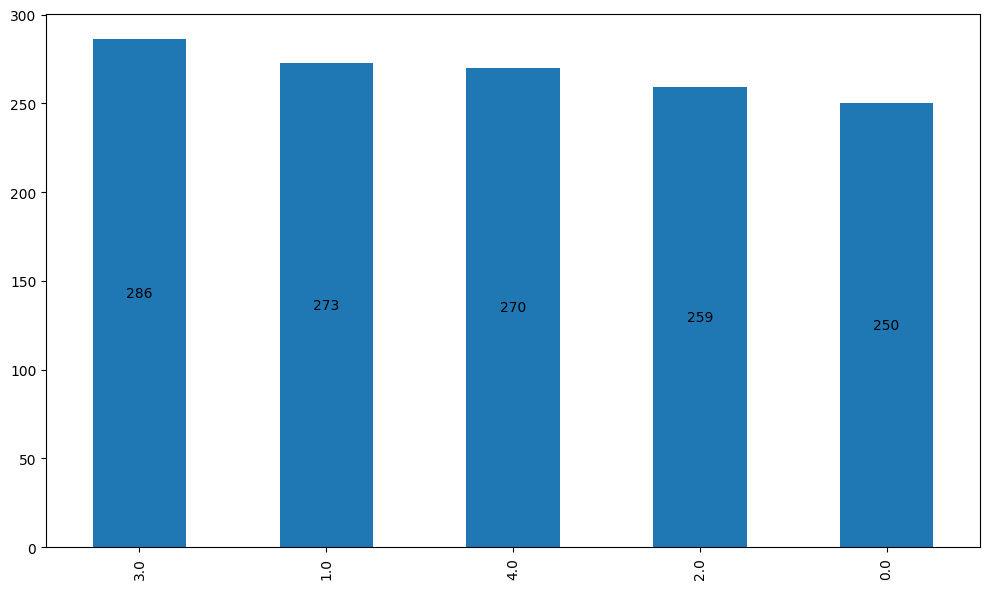

In [13]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10, 6))

# criando um gráfico de barras com a contagem de pessoas em cada intervalo de age_discretized
df.age_discretized.value_counts().plot(kind="bar", ax=ax)

# colocando a quantidade em cada intervalo
for c in ax.containers:
  ax.bar_label(c, label_type="center")
  
# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

Temos uma distrição muito parecida entre os grupos de ```age_discretized```.

## Categorizando BMI

In [14]:
# método para criar categorias [abaixo do peso, normal, sobre peso e obeso]
def bmi_description(bmi: float) -> str:
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

# adicionando nova coluna chamada bmi_description ao DataFrame
df = df.assign(bmi_description = df.bmi.apply(bmi_description))

# imprimindo as 5 primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese
2,28,male,33.000,3,no,southeast,4449.46200,1.0,obese
3,33,male,22.705,0,no,northwest,21984.47061,1.0,normal
4,32,male,28.880,0,no,northwest,3866.85520,1.0,overweight


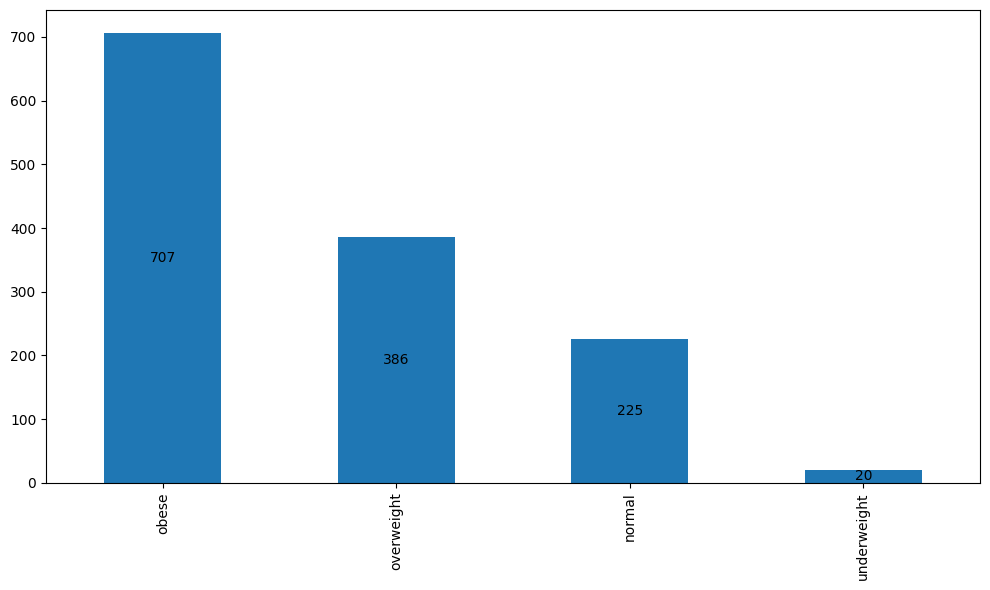

In [15]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10, 6))

df.bmi_description.value_counts().plot.bar(ax=ax);

# colocando a quantidade em cada intervalo
for c in ax.containers:
  ax.bar_label(c, label_type="center")
  
# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

In [16]:
df.bmi_description.value_counts(normalize=True)

obese          0.528401
overweight     0.288490
normal         0.168161
underweight    0.014948
Name: bmi_description, dtype: float64

Aproximadamente 80% das pessoas estão no sobrepeso ou obesas.

## Categorizando Children

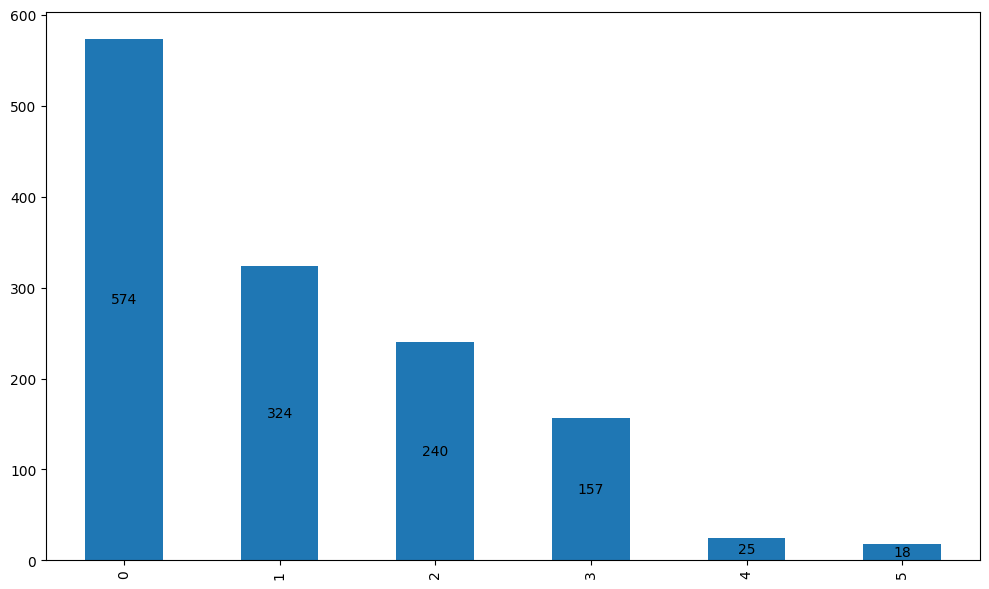

In [17]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10, 6))

df.children.value_counts().plot.bar(ax=ax);

# colocando a quantidade em cada intervalo
for c in ax.containers:
  ax.bar_label(c, label_type="center")
  
# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

In [18]:
# método para criar categorias [sem filhos, até 3 filhos, mais que 3 filhos]
def children_description(x: int) -> str:
    if x == 0:
        return 'no children'
    elif x < 4:
        return 'up to 3 children'
    else:
        return 'more than 3 children'

# adicionando nova coluna chamada children description
df = df.assign(children_description = df.children.apply(children_description))

# imprimindo as 5 primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children
2,28,male,33.000,3,no,southeast,4449.46200,1.0,obese,up to 3 children
3,33,male,22.705,0,no,northwest,21984.47061,1.0,normal,no children
4,32,male,28.880,0,no,northwest,3866.85520,1.0,overweight,no children


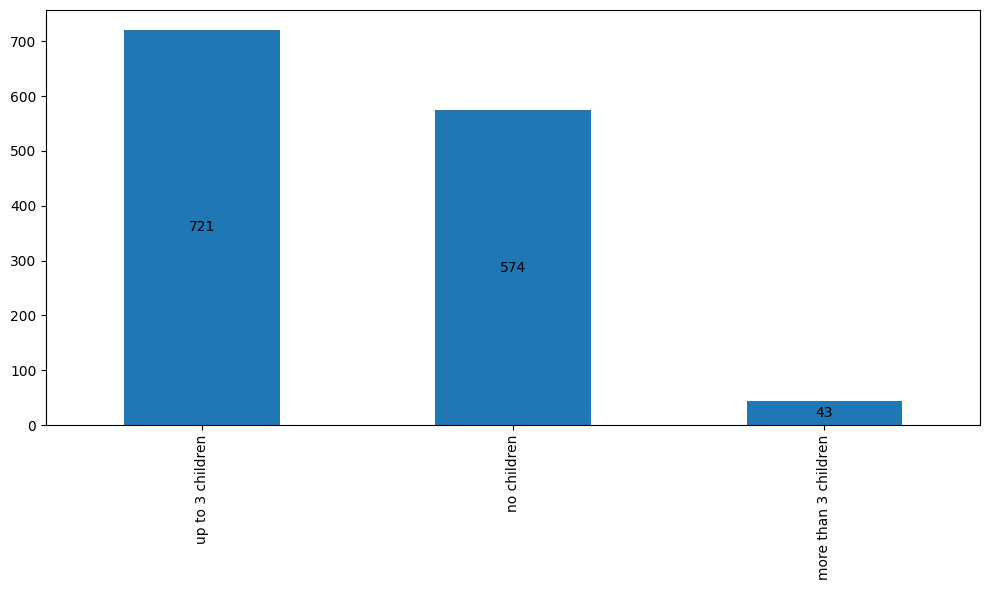

In [19]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10, 6))

df.children_description.value_counts().plot.bar(ax=ax);

# colocando a quantidade em cada intervalo
for c in ax.containers:
  ax.bar_label(c, label_type="center")
  
# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

In [20]:
df.children_description.value_counts(normalize=True)

up to 3 children        0.538864
no children             0.428999
more than 3 children    0.032138
Name: children_description, dtype: float64

* Mais que 50% das pessoas possuem até 3 filhos;
* Aproximadamente 43% não tem filhos;

Histograma Charges (alvo)

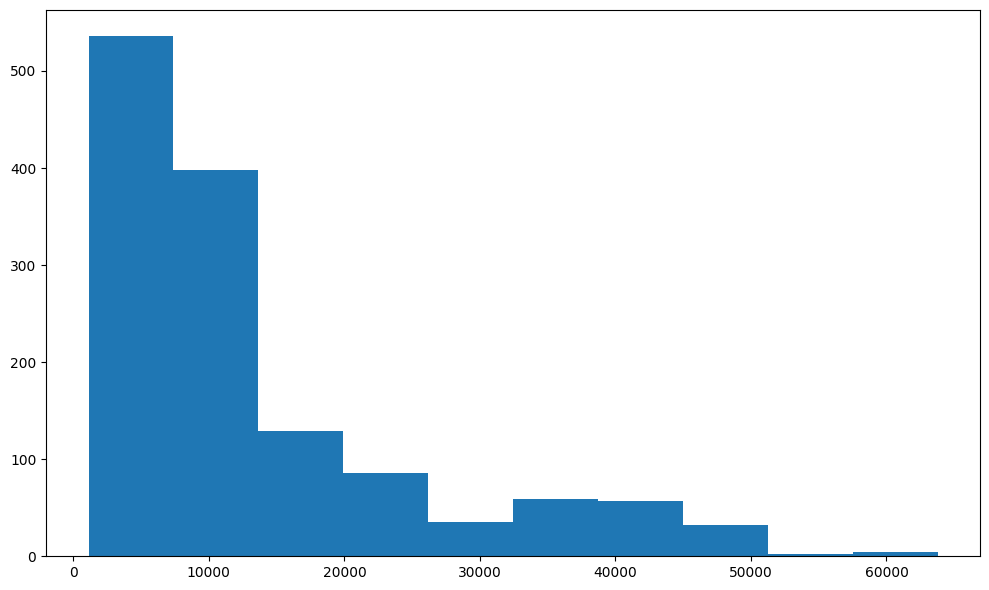

In [21]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

# plotando histograma
df.charges.hist(ax=ax, grid=False)

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

Abaixo é usado a função numpy.log que é comumente aplicada em colunas de um DataFrame que apresentam uma distribuição assimétrica positiva com o objetivo de transformar a distribuição em uma distribuição mais próxima de uma distribuição normal.

Uma distribuição assimétrica positiva é caracterizada por ter uma cauda mais longa na direção positiva em relação à média. Isso significa que os valores mais altos são mais raros do que os valores mais baixos e, portanto, os dados podem apresentar uma grande variação. Essa distribuição pode dificultar a análise estatística dos dados, uma vez que muitos métodos estatísticos assumem que os dados estão normalmente distribuídos.

Ao aplicar a função numpy.log na coluna, estamos realizando uma transformação logarítmica nos dados. A transformação logarítmica reduz a escala dos valores mais altos, tornando a distribuição mais simétrica e diminuindo a variação dos dados.

Uma distribuição mais próxima de uma distribuição normal é vantajosa porque muitas técnicas estatísticas, como regressão linear e análise de variância, são baseadas na suposição de que os dados seguem uma distribuição normal. Além disso, as transformações logarítmicas também podem ajudar a reduzir o impacto de valores extremos ou outliers na análise estatística.

No entanto, é importante lembrar que a aplicação da função numpy.log só deve ser feita após uma análise cuidadosa dos dados e de suas propriedades estatísticas. Em alguns casos, outras transformações podem ser mais apropriadas para normalizar os dados.

In [22]:
# aplicando a função np.log() a colunas charges e atribuindo os valores convertidos para uma nova coluna chamada charges_log
df = df.assign(charges_log = df.charges.apply(lambda x: np.log(x)))

# imprimindo os 5 primeiros registros
df.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,1.0,obese,up to 3 children,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,1.0,normal,no children,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,1.0,overweight,no children,8.260197


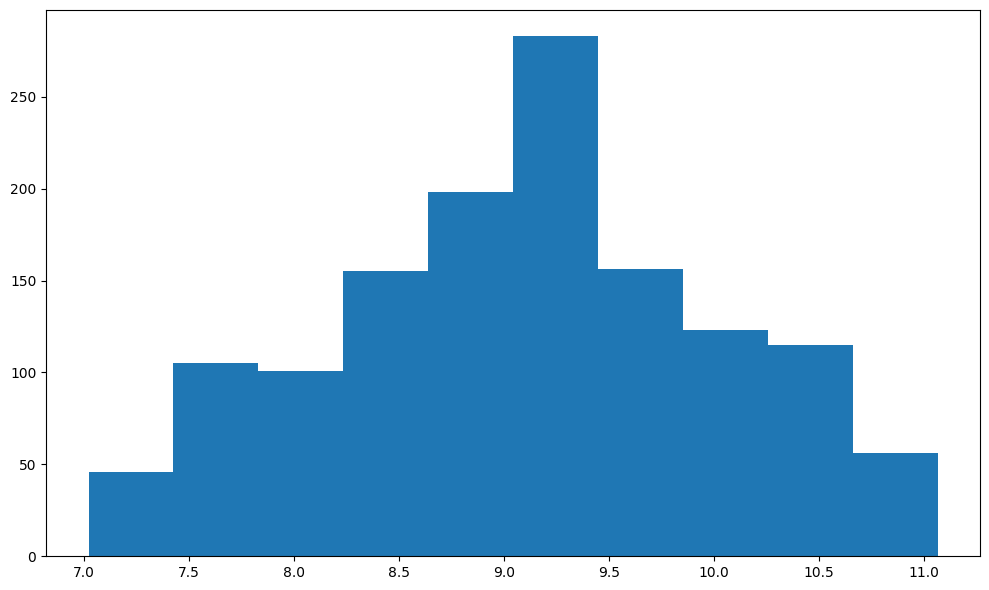

In [23]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

# plotando histograma
df.charges_log.hist(ax=ax, grid=False)

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,1.0,obese,up to 3 children,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,1.0,normal,no children,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,1.0,overweight,no children,8.260197


## Análise de densidade

O gráfico de densidade é um tipo de gráfico que mostra a distribuição de probabilidade de uma variável contínua. Ele é uma forma de visualização de dados estatísticos que ajuda a entender como os valores da variável estão distribuídos ao longo de um intervalo de valores.

Um gráfico de densidade mostra a "forma" da distribuição dos valores de uma variável contínua, bem como a concentração relativa de valores em diferentes partes da distribuição. Por exemplo, se a curva é alta e estreita, isso indica que a maioria dos valores estão concentrados em uma faixa relativamente estreita de valores; se a curva é mais plana e mais espalhada, isso indica que os valores estão mais distribuídos por uma faixa mais ampla.

Os gráficos de densidade são frequentemente usados para comparar a distribuição de uma variável em diferentes grupos ou amostras, ou para identificar valores atípicos (outliers) em uma distribuição. Eles também podem ser usados para mostrar como a distribuição de uma variável muda ao longo do tempo ou em diferentes circunstâncias.

### sex

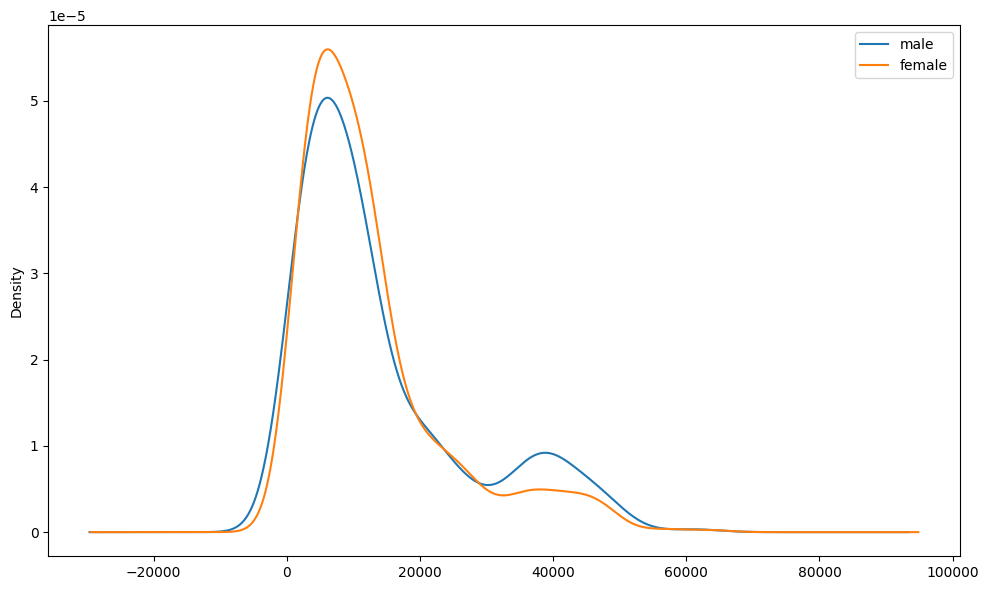

In [25]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

df[df.sex == 'male'].charges.plot.density(label="male")
df[df.sex == 'female'].charges.plot.density(label="female")

ax.legend()

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

### age

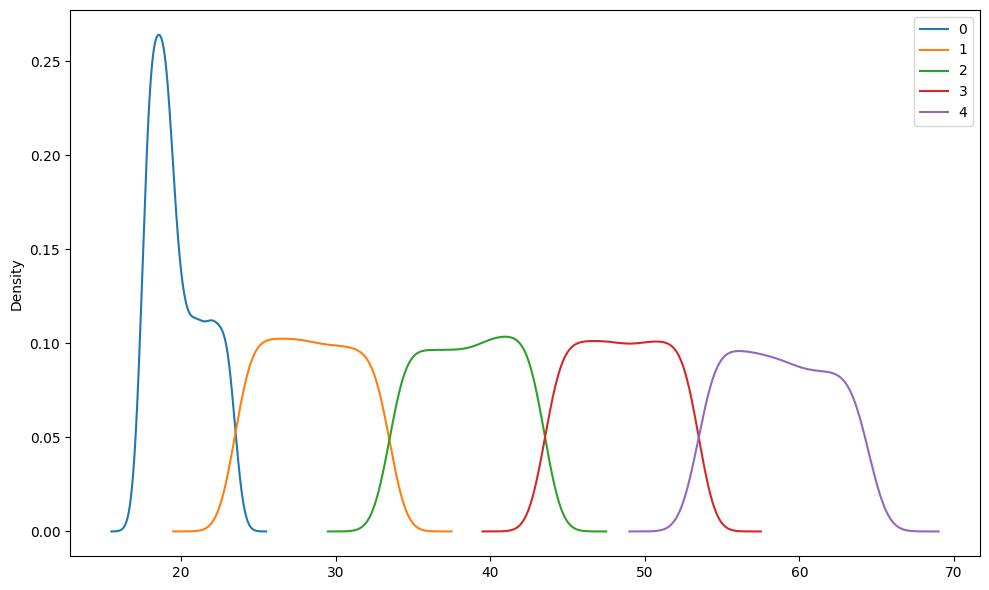

In [26]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

# plota um gráfico de densidade para cada intervalo de idade 
[df[df.age_discretized == i].age.plot.density(label=i) for i in range(n_bins)]

ax.legend()

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

REPARAR AQUI QUE NÃO ESTÁ SENDO UTILIZANDO A COLUNA CHARGES NO EIXO X.

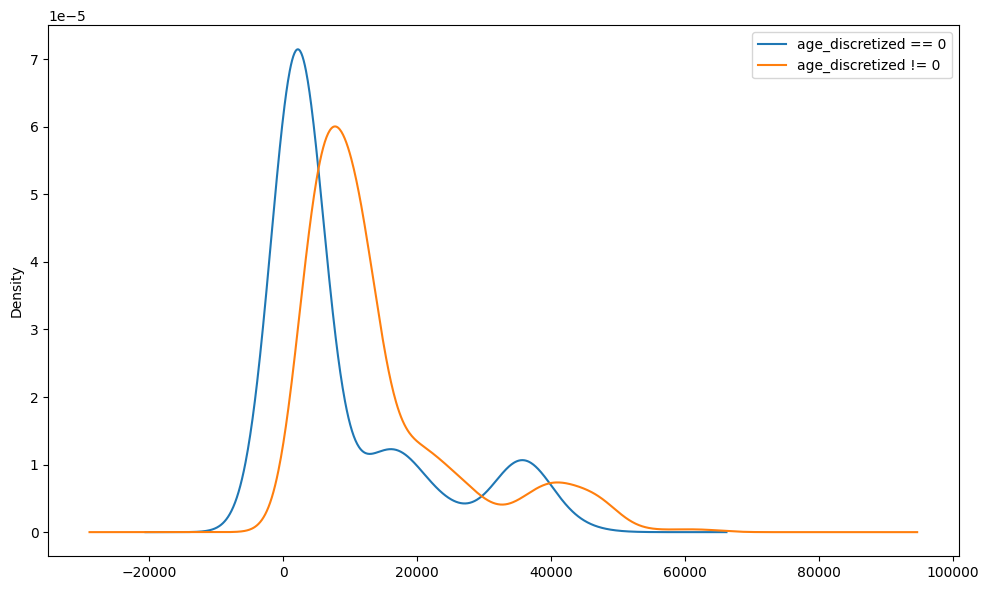

In [27]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

df[df.age_discretized == 0].charges.plot.density(label="age_discretized == 0")
df[df.age_discretized != 0].charges.plot.density(label="age_discretized != 0")

ax.legend()

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

### bmi

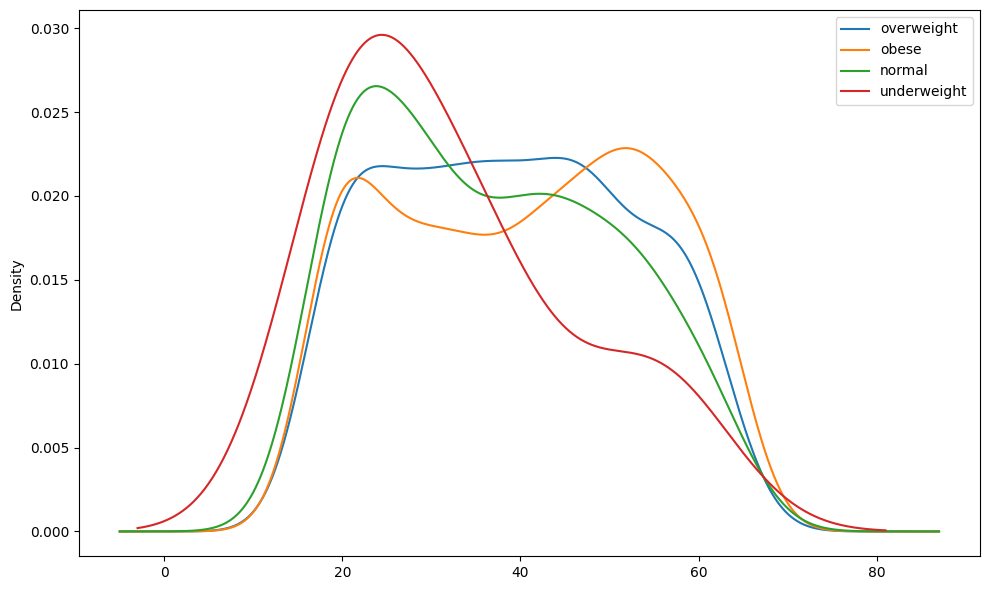

In [28]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

[df[df.bmi_description == bmi_description].age.plot.density(label=bmi_description) for bmi_description in list(df.bmi_description.unique())]

ax.legend()

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

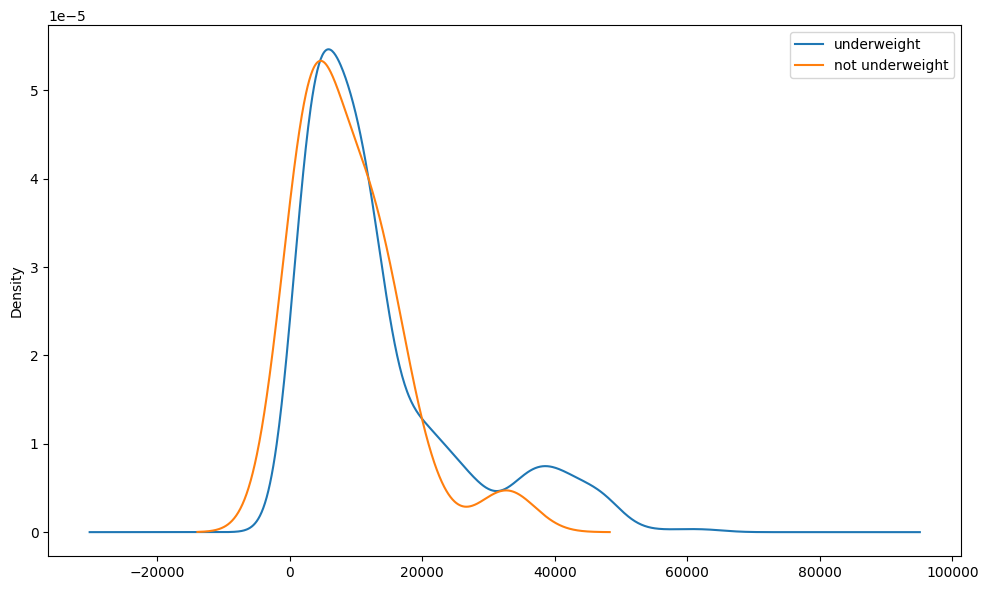

In [29]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

df[df.bmi_description != 'underweight'].charges.plot.density(label="underweight")
df[df.bmi_description == 'underweight'].charges.plot.density(label="not underweight")

ax.legend()

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

### children

In [30]:
list(df.children_description.unique())

['no children', 'up to 3 children', 'more than 3 children']

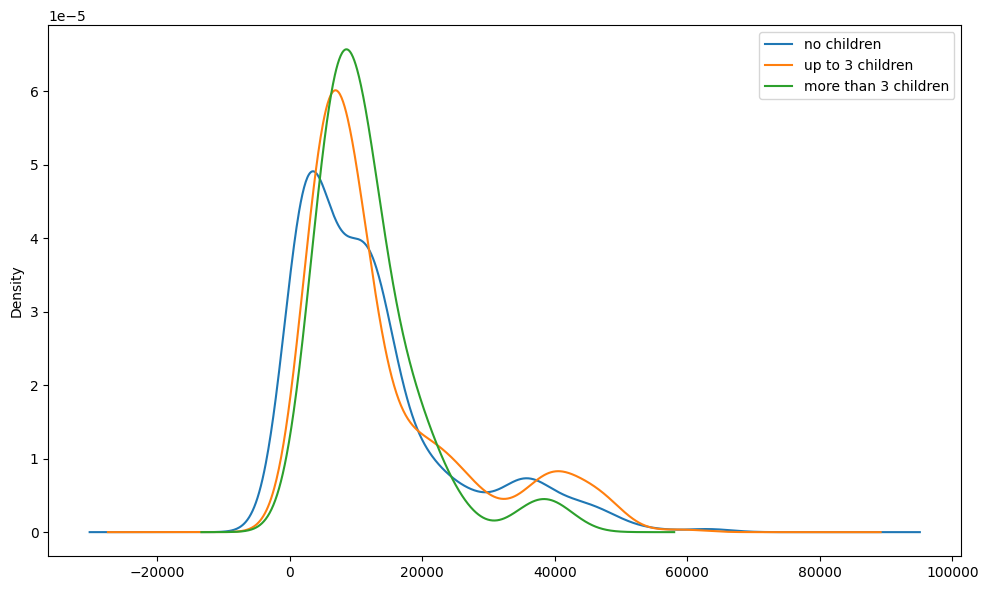

In [31]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

[df[df.children_description == children_description].charges.plot.density(label=children_description) for children_description in list(df.children_description.unique())]

ax.legend()

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

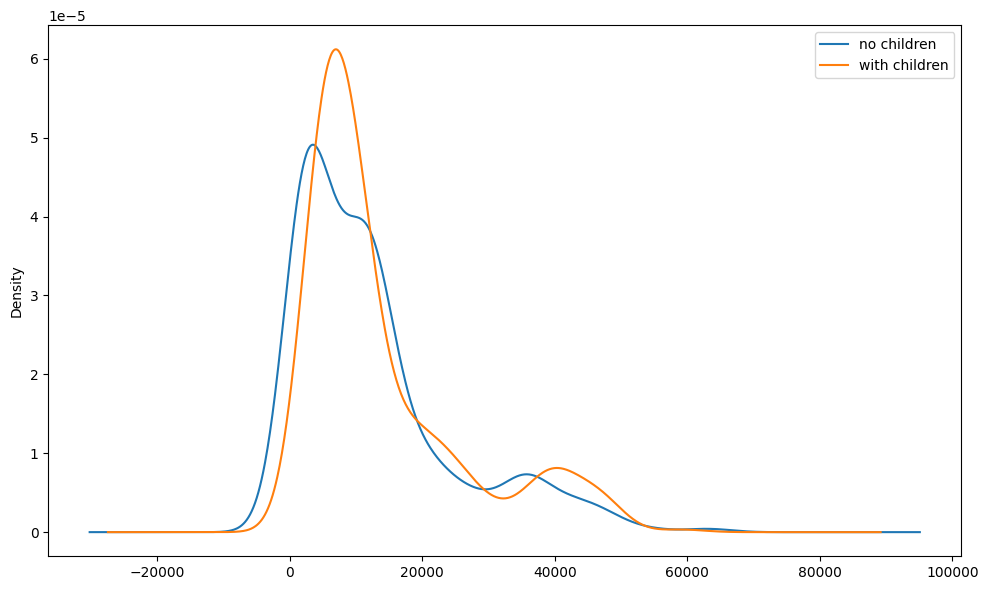

In [32]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

df[df.children_description == 'no children'].charges.plot.density(label="no children")
df[df.children_description != 'no children'].charges.plot.density(label="with children")

ax.legend()

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

### smoker

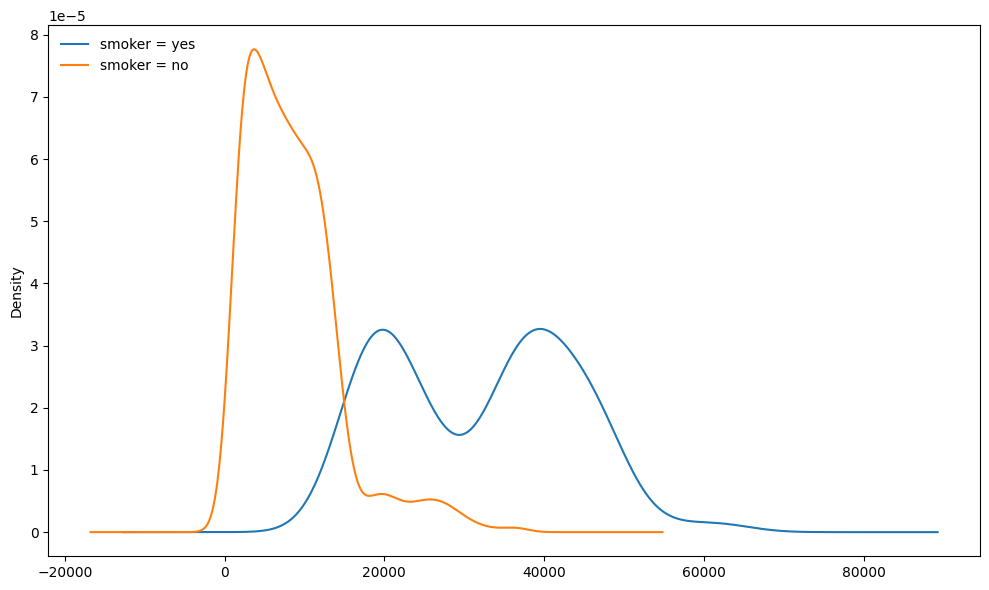

In [36]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

df[df.smoker == 'yes'].charges.plot.density(label="smoker = yes")
df[df.smoker == 'no'].charges.plot.density(label="smoker = no")

ax.legend(loc='upper left', frameon=False)

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

A linha azul representa as pessoas que fumam (```smoker == 'yes'```) onde é possível ver que as pessoas fumantes  tem um gasto maior com plano de saúde em relação ao grupo de pessoas não fumantes.

## Analise pessoas fumantes

Conforme visto no gráfico anterior, fumantes tem um gasto maior com plano de saúde, vale uma analise sobre os dados somente de pessoas fumantes.

In [43]:
# criando um DataFrame somente pessoas fumantes
df_subspace = df[df.smoker == 'yes']

# imprimindo as 5 primeiras colunas
df_subspace.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,charges_log
0,19,female,27.90,0,yes,southwest,16884.9240,0.0,overweight,no children,9.734176
11,62,female,26.29,0,yes,southeast,27808.7251,4.0,overweight,no children,10.233105
14,27,male,42.13,0,yes,southeast,39611.7577,1.0,obese,no children,10.586881
19,30,male,35.30,0,yes,southwest,36837.4670,1.0,obese,no children,10.514271
23,34,female,31.92,1,yes,northeast,37701.8768,2.0,obese,up to 3 children,10.537465


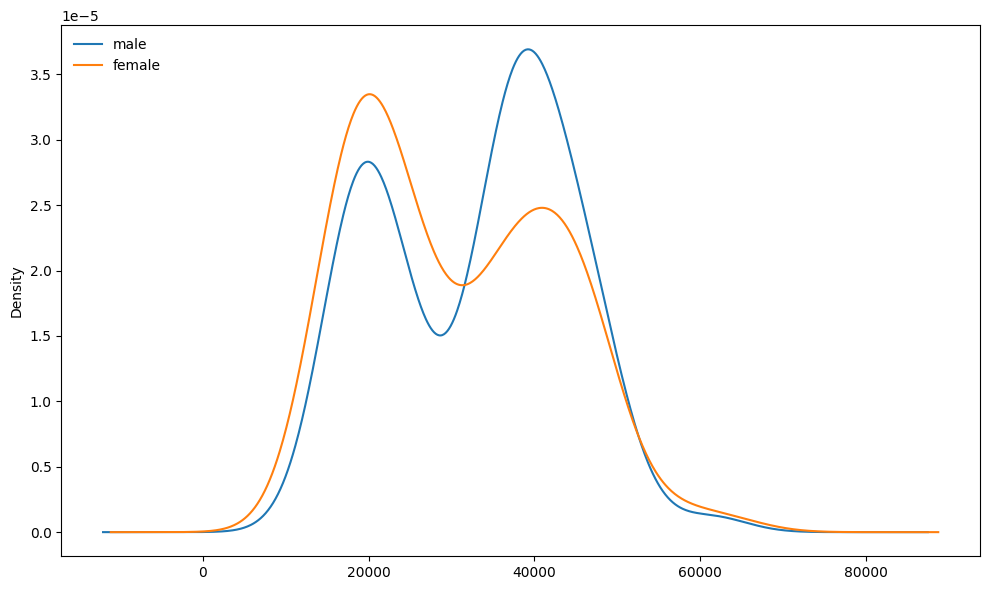

In [44]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

df_subspace[df_subspace.sex == 'male'].charges.plot.density(label="male")
df_subspace[df_subspace.sex == 'female'].charges.plot.density(label="female")

ax.legend(loc='upper left', frameon=False)

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

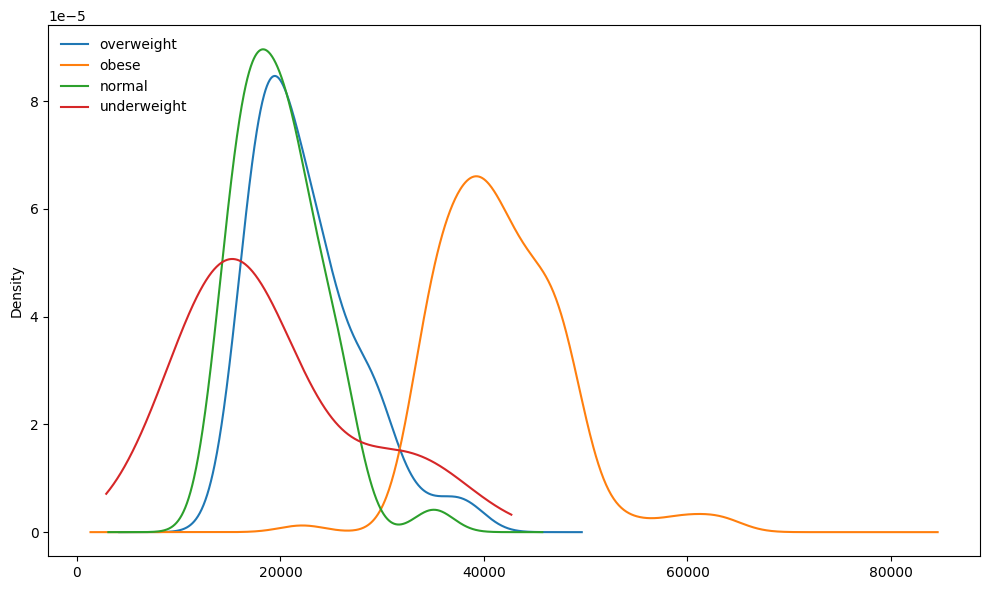

In [45]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

[df_subspace[df_subspace.bmi_description == bmi_description].charges.plot.density(label=bmi_description) for bmi_description in list(df_subspace.bmi_description.unique())]

ax.legend(loc='upper left', frameon=False)

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

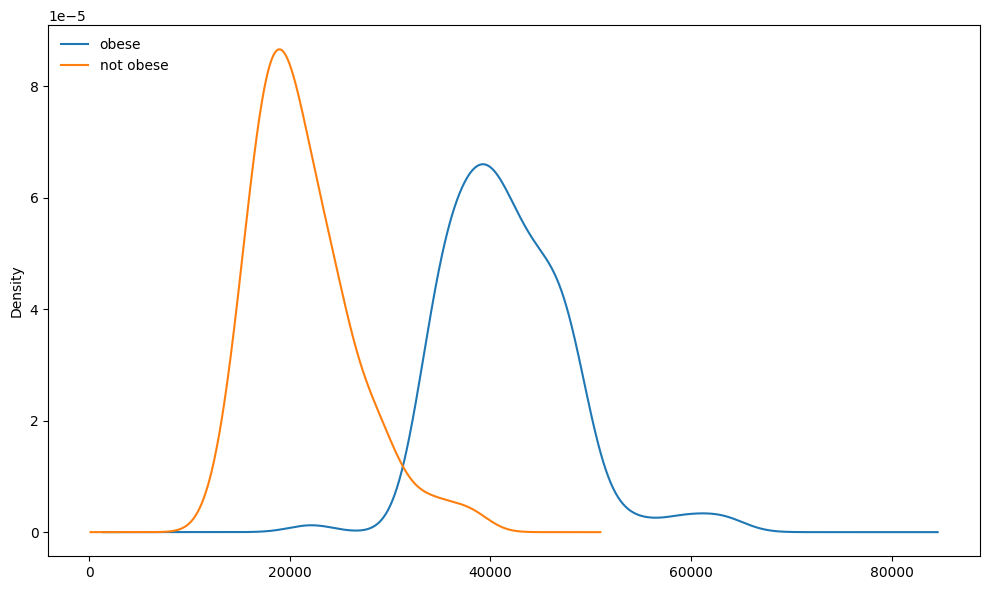

In [46]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

df_subspace[df_subspace.bmi_description == "obese"].charges.plot.density(label="obese")
df_subspace[df_subspace.bmi_description != "obese"].charges.plot.density(label="not obese")

ax.legend(loc='upper left', frameon=False)

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

Pessoas obesas e fumamntes tem um gasto maior com plano de saúde.

Com as analises acima, comseguimos enxergar que pessoas fumantes e obesas tem gastos relativamente maiores em relação as pessoas que não são obesas e não são fumantes.

Vamos agrupar estas pessoas em uma unica coluna concatenando os valores de ```smoker``` e ```bmi```.

In [47]:
# concatenando smoker e bmi_description em uma nova coluna chamada smoker_bmi
df = df.assign(smoker_bmi = df.apply(lambda x: '{}_{}'.format(x.smoker, x.bmi_description), axis=1))

# imprimindo os 5 primeiros registros
df.head()

,age,sex,bmi,children,smoker,region,charges,age_discretized,bmi_description,children_description,charges_log,smoker_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,overweight,no children,9.734176,yes_overweight
1,18,male,33.770,1,no,southeast,1725.55230,0.0,obese,up to 3 children,7.453302,no_obese
2,28,male,33.000,3,no,southeast,4449.46200,1.0,obese,up to 3 children,8.400538,no_obese
3,33,male,22.705,0,no,northwest,21984.47061,1.0,normal,no children,9.998092,no_normal
4,32,male,28.880,0,no,northwest,3866.85520,1.0,overweight,no children,8.260197,no_overweight


In [48]:
sorted(list(df.smoker_bmi.unique()))

['no_normal',
 'no_obese',
 'no_overweight',
 'no_underweight',
 'yes_normal',
 'yes_obese',
 'yes_overweight',
 'yes_underweight']

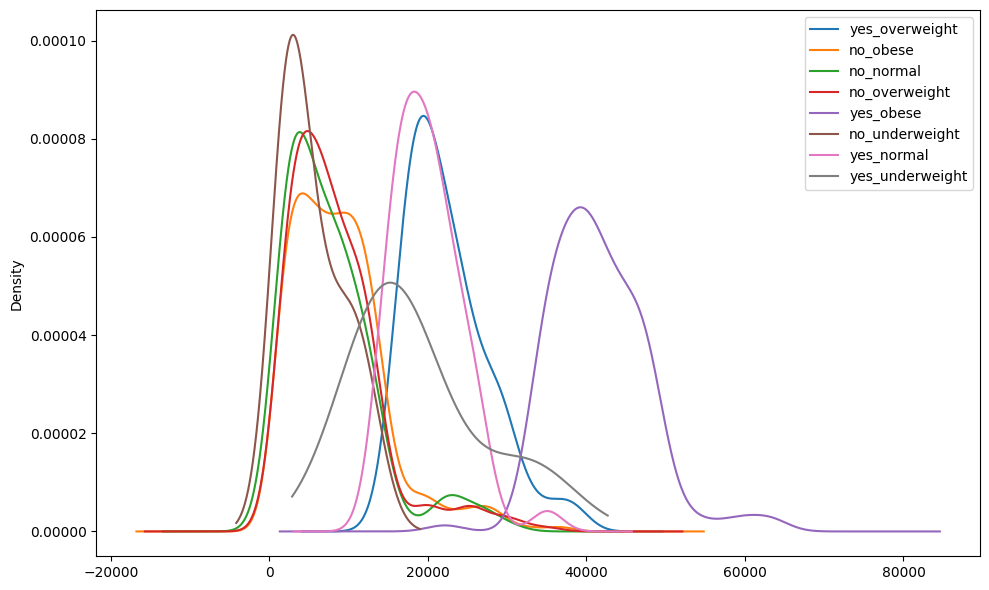

In [49]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

[df[df.smoker_bmi == smoker_bmi].charges.plot.density(label=smoker_bmi) for smoker_bmi in list(df.smoker_bmi.unique())]

ax.legend()

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()


Pelo gráfico acima é possivel diminuir a quantidade de categorias criadas resultante da concatenação das colunas ```smoker``` e ```bmi``` e agrypar ainda mais estes grupos.

Na linha de código abaixo todos os valores da coluna ```somker_bmi``` que iniciárem com `no` serão substitídos pelo valor `no` na coluna.

Ou seja, o valores:

* 'no_normal'
* 'no_obese'
* 'no_overweight'
* 'no_underweight'

receberão o valor `no`.

In [50]:
# aplicando a string "no" para os valores que iniciam no "no" 
df.smoker_bmi = df.smoker_bmi.apply(lambda x: 'no' if x.startswith('no') else x)

Restaram  os valores:

* 'yes_normal'
* 'yes_obese'
* 'yes_overweight'
* 'yes_underweight'

Para estes valores será mantida somente os valores iguais a "yes_obese", os demais serão alterados para "yes_not_obese".

In [51]:
# aplicando a string "yes_not_obese" para os valores que iniciam no "yes" e não possuem "obese" 
df.smoker_bmi = df.smoker_bmi.apply(lambda x: 'yes_not_obese' if x.startswith('yes') and 'obese' not in x else x)

# verificando valores unicos na coluna smoker_bmi
df.smoker_bmi.unique()

array(['yes_not_obese', 'no', 'yes_obese'], dtype=object)

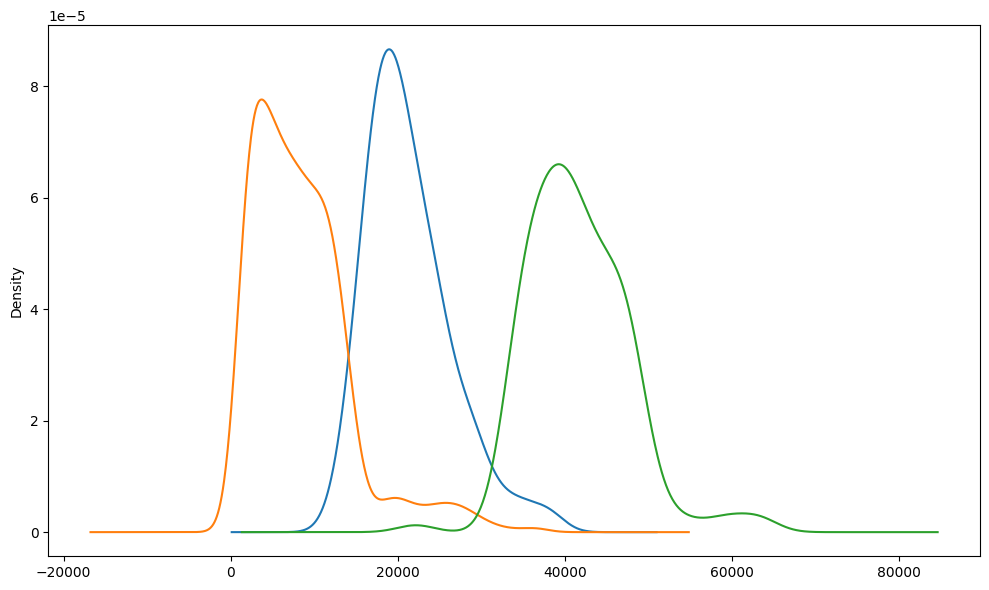

In [52]:
# instanciando os objetos fig e ax
fig, ax = plt.subplots(figsize=(10,6))

[df[df.smoker_bmi == smoker_bmi].charges.plot.density() for smoker_bmi in list(df.smoker_bmi.unique())]

# ajusta o layout do gráfico para garantir que todos os elementos estejam visíveis
plt.tight_layout()

Veja como estes grupos conseguem explicar bem a nossa variável alvo (charges), através da nova coluna "smoker_bmi" conseguimos separar bem o custo médio das pessoas para cada uma das categorias criadas.

In [53]:
# exportando DataFrame para CSV
df.to_csv("insurance_clean.csv", sep=";", index=False)